<a href="https://colab.research.google.com/github/WKR01/Projekt-PUM/blob/main/preprocessing_v2_GG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-white.csv to winequality-white (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv("winequality-white.csv")
df.head()

,fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;quality
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [ ]:
df.shape

(4898, 1)

In [ ]:
df.columns

Index(['fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;quality'], dtype='object')

In [ ]:
df.dtypes

fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;quality    object
dtype: object

In [ ]:

df[['Fixed_Acidity', 'Volatile_Acidity', 'Citric_Acid', 'Residual_Sugar', 'Chlorides',
    'Free_Sulfur_Dioxide', 'Total_Sulfur_Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol', 'Quality']] = df['fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;quality'].str.split(';', expand=True)


df.drop('fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;quality', axis=1, inplace=True)


In [ ]:
all_columns = ['Fixed_Acidity', 'Volatile_Acidity', 'Citric_Acid', 'Residual_Sugar', 'Chlorides', 'Free_Sulfur_Dioxide', 'Total_Sulfur_Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol', 'Quality']
for column in all_columns:
    df[column] = df[column].str.strip('-_')

In [ ]:
columns_to_float = ['Fixed_Acidity', 'Volatile_Acidity', 'Citric_Acid', 'Residual_Sugar', 'Chlorides',
    'Free_Sulfur_Dioxide', 'Total_Sulfur_Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol']
for column in columns_to_float:
  df[column] = pd.to_numeric(df[column], errors='coerce').astype('float64')

In [ ]:
df['Quality'] = pd.to_numeric(df["Quality"], errors='coerce').astype('int64')

In [ ]:
df.dtypes

Fixed_Acidity           float64
Volatile_Acidity        float64
Citric_Acid             float64
Residual_Sugar          float64
Chlorides               float64
Free_Sulfur_Dioxide     float64
Total_Sulfur_Dioxide    float64
Density                 float64
pH                      float64
Sulphates               float64
Alcohol                 float64
Quality                   int64
dtype: object

In [ ]:
df.head(568)

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
563,7.4,0.30,0.22,1.4,0.046,16.0,135.0,0.9928,3.08,0.77,10.4,7
564,6.8,0.51,0.30,4.2,0.066,38.0,165.0,0.9945,3.20,0.42,9.1,5
565,7.8,0.22,0.38,10.3,0.059,28.0,99.0,0.9967,3.12,0.47,10.0,6
566,7.2,0.35,0.34,12.4,0.051,6.0,37.0,0.9944,3.13,0.39,11.5,6


In [ ]:
if_null = df.isnull().any()
print(if_null)

Fixed_Acidity           False
Volatile_Acidity        False
Citric_Acid             False
Residual_Sugar          False
Chlorides                True
Free_Sulfur_Dioxide     False
Total_Sulfur_Dioxide    False
Density                 False
pH                      False
Sulphates               False
Alcohol                  True
Quality                 False
dtype: bool


In [ ]:
for column in df.columns:
  most_common_value = df[column].value_counts().idxmax()
  print(f"Most common value in column '{column}': {most_common_value}")
  max_value = df[column].max()
  print(f"Max value in column '{column}': {max_value}")


Most common value in column 'Fixed_Acidity': 6.8
Max value in column 'Fixed_Acidity': 14.2
Most common value in column 'Volatile_Acidity': 0.28
Max value in column 'Volatile_Acidity': 1.1
Most common value in column 'Citric_Acid': 0.3
Max value in column 'Citric_Acid': 1.66
Most common value in column 'Residual_Sugar': 1.2
Max value in column 'Residual_Sugar': 65.8
Most common value in column 'Chlorides': 0.044
Max value in column 'Chlorides': 0.346
Most common value in column 'Free_Sulfur_Dioxide': 29.0
Max value in column 'Free_Sulfur_Dioxide': 289.0
Most common value in column 'Total_Sulfur_Dioxide': 111.0
Max value in column 'Total_Sulfur_Dioxide': 440.0
Most common value in column 'Density': 0.992
Max value in column 'Density': 1.03898
Most common value in column 'pH': 3.14
Max value in column 'pH': 3.82
Most common value in column 'Sulphates': 0.5
Max value in column 'Sulphates': 1.08
Most common value in column 'Alcohol': 9.4
Max value in column 'Alcohol': 1000.0
Most common val

In [ ]:
df["Chlorides"] = df["Chlorides"].fillna(df["Chlorides"].value_counts().idxmax())
df["Alcohol"] = df["Alcohol"].fillna(df["Alcohol"].value_counts().idxmax())

In [ ]:
for column in df.columns:
  negative_values_exist = (df[column] < 0).any()

if negative_values_exist:
    print("There are negative values in columns")
else:
    print("There are no negative values in columns")

There are no negative values in columns


In [ ]:
df.shape

(4898, 12)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
Q1 = df.drop("Quality", axis=1).quantile(0.25)
Q3 = df.drop("Quality", axis=1).quantile(0.75)
IQR = Q3 - Q1

for column in df.drop("Quality", axis=1).columns:
    df = df.drop(df.loc[(df[column] > (Q3[column] + 1.5 * IQR[column])) |
                        (df[column] < (Q1[column] - 1.5 * IQR[column]))].index, axis=0)

<function matplotlib.pyplot.show(close=None, block=None)>

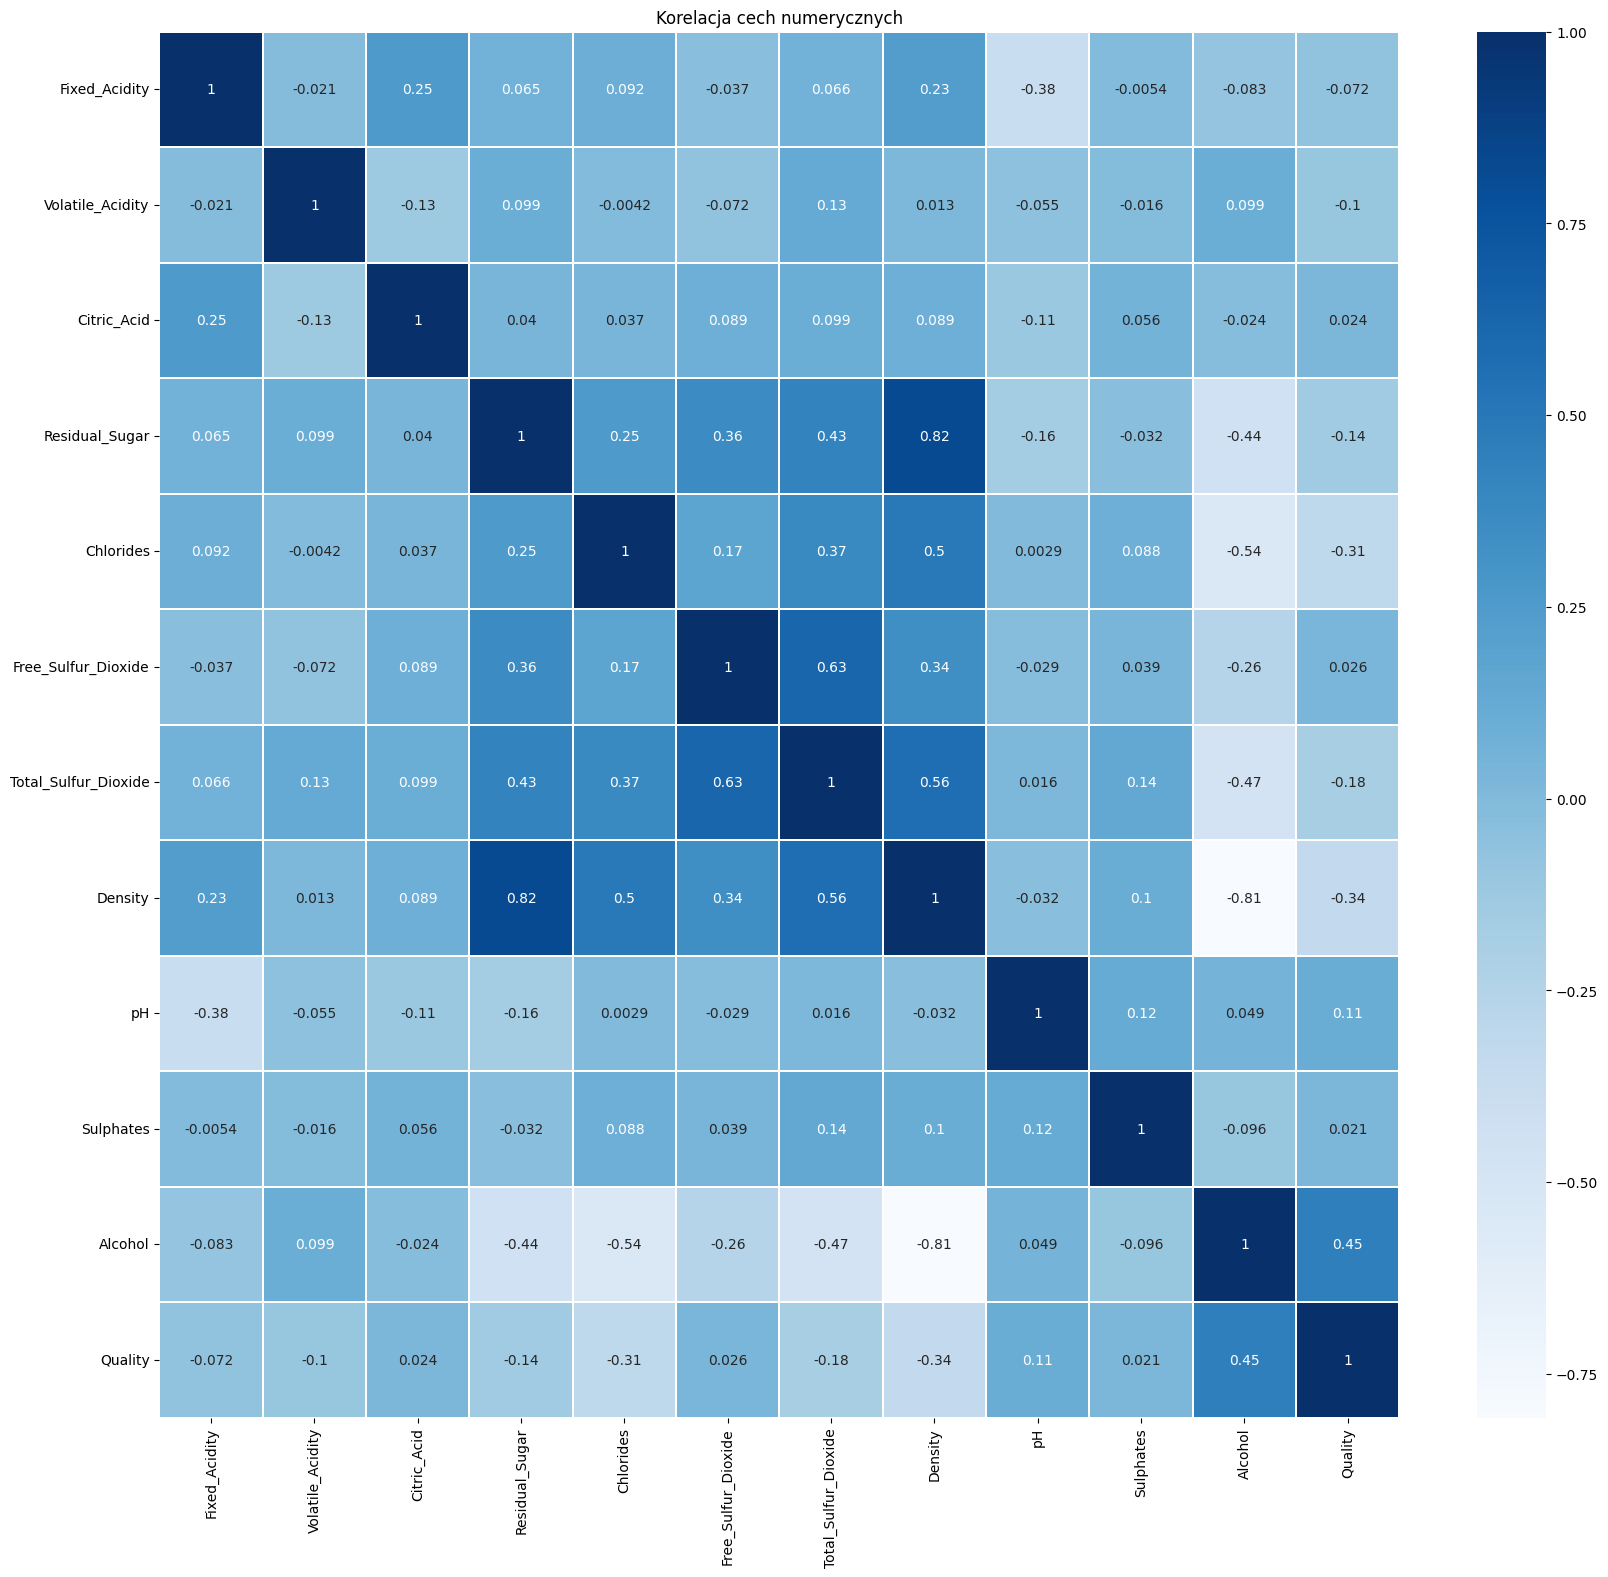

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



corr_matrix = df.corr()
plt.figure(figsize=(20,18))
sns.heatmap(corr_matrix,annot=True, linewidths = 0.1, cmap="Blues")
plt.title('Korelacja cech numerycznych')
plt.show

Text(0, 0.5, 'Korelacja (%)')

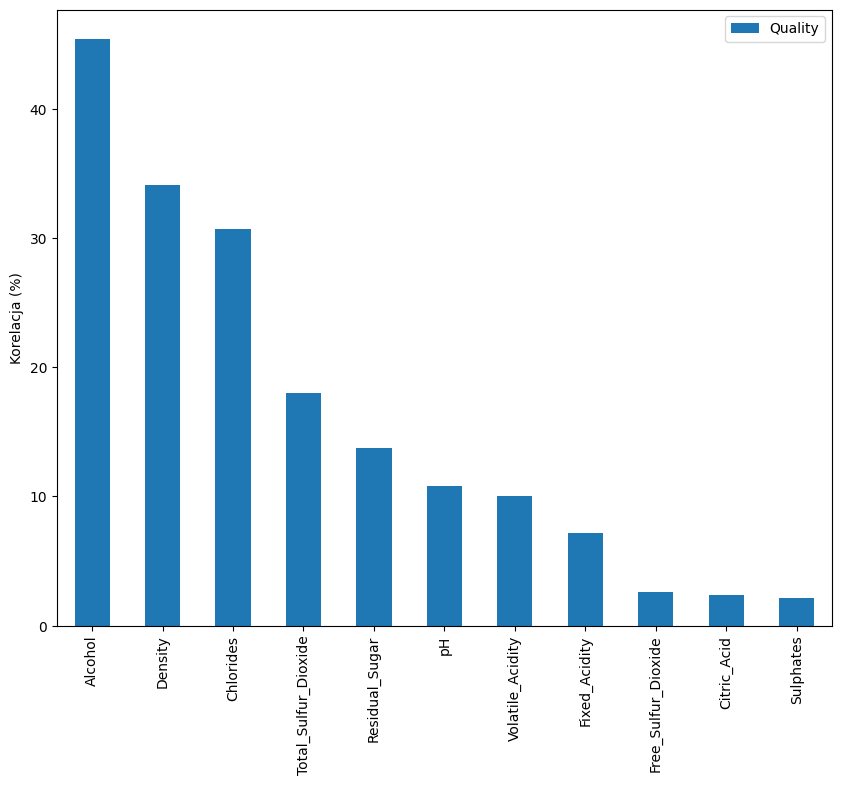

In [ ]:
pd.DataFrame(abs(df.corr()['Quality'].drop('Quality')*100).sort_values(
ascending=False)).plot.bar(figsize = (10,8))
plt.ylabel('Korelacja (%)')

In [ ]:
#drop najmniejszych korelacji
df_cleaned = df.drop(["Free_Sulfur_Dioxide", "Citric_Acid", "Sulphates"], axis=1)

In [ ]:
#standaryzacja/skalowanie MinMax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col_float = list(df_cleaned.select_dtypes(include='float').columns)
for i in df_cleaned[col_float]:
  df_cleaned[i] = scaler.fit_transform(df_cleaned[[i]])
df_cleaned.head()

,Fixed_Acidity,Volatile_Acidity,Residual_Sugar,Chlorides,Total_Sulfur_Dioxide,Density,pH,Alcohol,Quality
1,0.375,0.511628,0.052083,0.607143,0.476793,0.472241,0.6375,0.189655,6
2,0.825,0.465116,0.328125,0.625000,0.329114,0.547635,0.5875,0.293103,6
3,0.600,0.348837,0.411458,0.767857,0.704641,0.581905,0.5000,0.258621,6
6,0.350,0.558140,0.333333,0.535714,0.493671,0.533927,0.4875,0.206897,6
9,0.825,0.325581,0.046875,0.517857,0.464135,0.458533,0.5375,0.448276,6


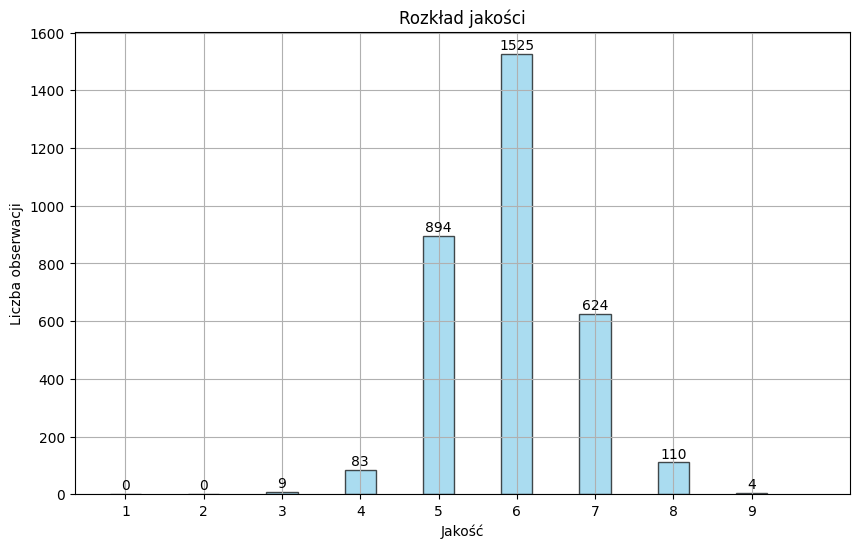

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

bar_width = 0.4

counts, bins, _ = plt.hist(df_cleaned['Quality'], bins=np.arange(1, 11) - bar_width / 2, width=bar_width,
                           color='skyblue', edgecolor='black', alpha=0.7)

for count, x in zip(counts, bins[:-1]):
    plt.text(x + bar_width / 2, count + 5, int(count), ha='center', va='bottom')

plt.title('Rozkład jakości')
plt.xlabel('Jakość')
plt.ylabel('Liczba obserwacji')

plt.xticks(range(1, 10))

plt.grid(True)
plt.show()


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# Wyodrębnienie cech i etykiet
X = df.drop(columns=['Quality'])
y = df['Quality']


# Inicjalizacja i dopasowanie OrdinalEncoder
enc = OrdinalEncoder()
X_encoded = enc.fit_transform(X)


# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error

# Inicjalizacja i dopasowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

# Przewidywanie na zbiorze testowym
y_pred = model.predict(X_test)

print("Średni błąd bezwzględny: ",mean_absolute_error(y_test,y_pred))

print("Mediana błędu bezwzględnego: ",median_absolute_error(y_test,y_pred))

Średni błąd bezwzględny wynosi:  0.6074923307097895
Mediana błędu bezwzględnego wynosi:  0.5263066633095064


In [ ]:
from sklearn.metrics import r2_score
# Obliczenie R^2
r2 = r2_score(y_test, y_pred)
print("Współczynnik determinacji (R^2):", r2) #dopasowanie modelu do danych, im wyższy R^2 tym model bardziej dopasowany, przyjmuje wartości od 0 do 1

Współczynnik determinacji (R^2): 0.20039631889760356


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Obliczenie Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred) #średnia kwadratów różnic pomiędzy wartościami przewidywanymi przez model, a rzeczywistymi wartościami. Im niższy MSE, tym lepszy model

# Obliczenie Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse) #pierwiastek kwadratowy z MSE, co daje nam średnią wartość błędu w oryginalnych jednostkach danych

Root Mean Squared Error (RMSE): 0.9761551983248378


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Obliczanie VIF dla każdej z cech
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                 feature          VIF
0          Fixed_Acidity   106.905269
1       Volatile_Acidity    14.554300
2            Citric_Acid    16.863350
3         Residual_Sugar     3.853326
4              Chlorides    27.930385
5    Free_Sulfur_Dioxide    11.284942
6   Total_Sulfur_Dioxide    27.295843
7                Density  1194.491814
8                     pH   667.515225
9              Sulphates    26.303701
10               Alcohol   146.597571


In [ ]:
from sklearn.linear_model import HuberRegressor

model = HuberRegressor()
model.fit(X_train, y_train)

# Przewidywanie na zbiorze testowym
y_pred = model.predict(X_test)

print("Średni błąd bezwzględny: ",mean_absolute_error(y_test,y_pred))

print("Mediana błędu bezwzględnego: ",median_absolute_error(y_test,y_pred))

Średni błąd bezwzględny wynosi:  0.7638800290394455
Mediana błędu bezwzględnego wynosi:  0.6348734193446739


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
